# End to End Machine Learning Project

## Machine Learning Project Checklist

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning
algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
Obviously, you should feel free to adapt this checklist to your needs

--------

# 1) Look at the big picture


## 1.1). Frame the problem and look at the big picture.
- What is the business problem? what they are trying to achieve? How this ML model and it's output are going to be used?
- Is there any current solution? How does it look like? Use as a reference for performance, get insights.

### Start Designing your system
- Is it supervised or unsupervised or reinforcement learning?
- is it classification/ regression or something else?
- should we use batch learning or online learning techniques?
- try to ask as much questions 

## 1.2). Select the performance Measure
- How are we going to measure our model performance?
- for regression problems: 
    - `Root Mean Square Error (RMSE)`, but RMSE is more sensitive to outliers. So use RMSE for normally distributed data.
    - if there are too many outliers, we might want to use `MAE`
    
## 1.3). Check the Assumptions
- recheck the assumptions made by us and other team. Check the assumptions of inputs, outputs and how other systems expect the model's output and how are they going to use it.

-------

# 2) Get the Data

## 2.1) Create the workspace

In [2]:
import numpy as np
import pandas as pd
import sklearn

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Project Set up to save figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2.2) Download the data

In [7]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'


# download the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

### Take a Quick Look at the Data Structure

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are some missing values for `total_bedrooms`

As every features is numerical, except for `ocean_proximity`. We want to see the unique values for this feature.

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Saving figure attribute_histogram_plots


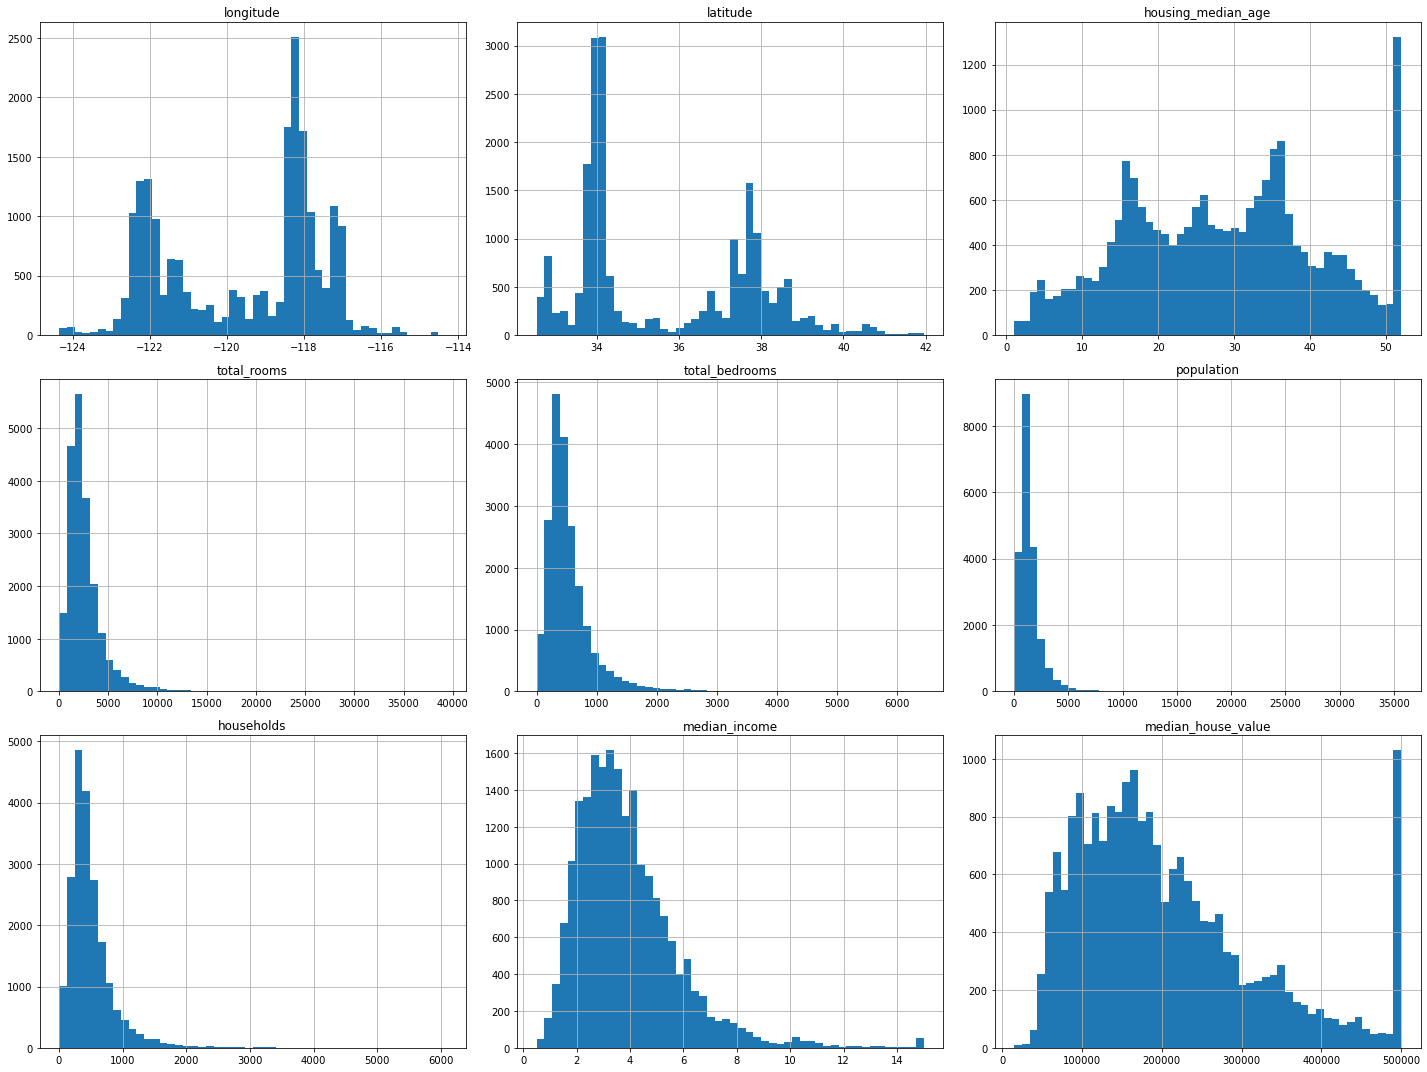

In [11]:
# to see the distribution of the data
%matplotlib inline

housing.hist(bins=50, figsize=(20, 15));
save_fig('attribute_histogram_plots')
plt.show();

------

## 2.3) Create Test Set

- When you estimate the generalization error using the test
set, your estimate will be too optimistic, and you will launch a system that will not
perform as well as expected. This is called **data snooping bias**.
- Creating a test set is theoretically simple: pick some instances randomly, typically
20% of the dataset (or less if your dataset is very large), and set them aside:

In [12]:
import numpy as np

np.random.seed(42)

In [13]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    
    test_set_size = int(len(data) * test_ratio)
    
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    
    return data.loc[train_indices], data.loc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

In [15]:
len(housing), len(train_set), len(test_set)

(20640, 16512, 4128)

-------

### If we want our test set to be consistent everytime, we can use the below code.

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


----

### Splitting data
But we can do those above by using sklearn builtin function.

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
test_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND


-------

# Random Sampling Method
- it is generally fine if the data is large enough (especially relative to the number of attributes)
- else we have the risk of introducing `significant sampling bias`.

# Stratified Sampling

When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to **maintain this ratio in the sample**: 513 female and 487 male. 

This is called **stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population**. If the people running the survey used purely random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

### For our problem, it is `median income` after consulting with the experts.

As `median income` data is important attribute to predict median housing prices. So we want to make sure the **test set is representative of various categories of incomes** in the whole datset.  Since median income is numerical data, we will create income categorical attribute.

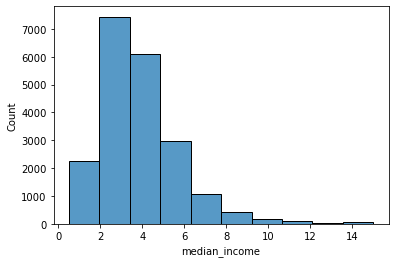

In [23]:
# see the ranges of data using histogram
sns.histplot(housing['median_income'], bins=10);

### Create Categorical Bins for Median_Income

In [24]:
# now will create categorical bins
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [25]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

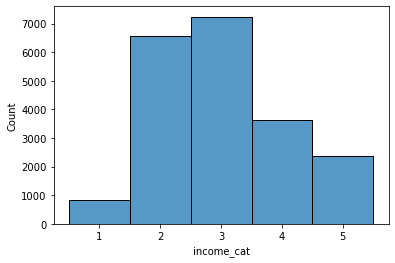

In [26]:
sns.histplot(housing['income_cat']);

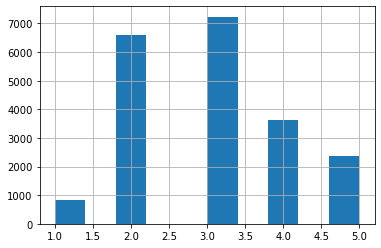

In [27]:
housing['income_cat'].hist();

###  stratified sampling based on income categories

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
# now we will stratified sampling based on income categories

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [37]:
# check the split is correct or not
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [38]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

As we we can see the test set generated using stratified sampling has income category propotions almost identical to those in full dataset.

In [39]:
# compare the income proporations between stratified data and randomly selected data
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

In [40]:
compare_props

,Overall,Stratified,Random,Rand. %error
1,0.039826,0.039729,0.040213,0.973236
2,0.318847,0.318798,0.324370,1.732260
3,0.350581,0.350533,0.358527,2.266446
4,0.176308,0.176357,0.167393,-5.056334
5,0.114438,0.114583,0.109496,-4.318374


We can see that Startified data sample is much more likely to the Overall distribution of original dataset while Random one is not.

In [41]:
# now remove the Income Category column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [42]:
train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3


--------

## 3) Discover and Visualize the Data to Gain Insights

In [43]:
# get the copy to explore
housing = strat_train_set.copy()

## 3.1) Visualization Geographical Data

Saving figure bad_visulaization_plot


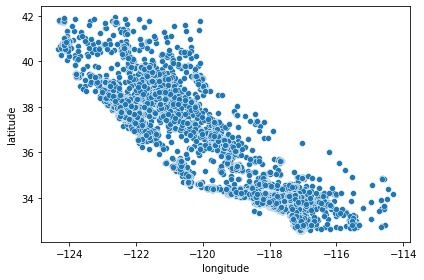

In [44]:
sns.scatterplot(data=housing, x='longitude', y='latitude')
save_fig('bad_visulaization_plot');

Saving figure better_visualiztion_plot


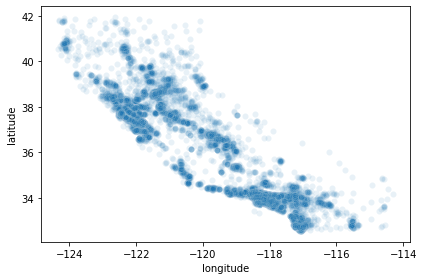

In [45]:
sns.scatterplot(data=housing, x='longitude', y='latitude', alpha=0.1);
save_fig('better_visualiztion_plot')

#### we need to make patterns stand out

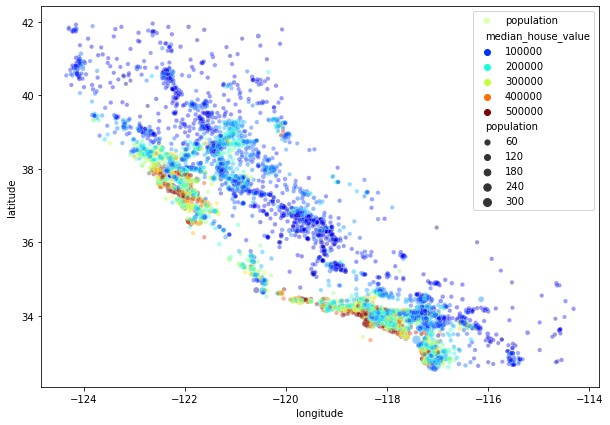

In [46]:
plt.figure(figsize =(10,7))

sns.scatterplot(data=housing, x='longitude', y='latitude', alpha=0.4,
                       size=housing['population']/100,
                       label='population',
                       hue='median_house_value',
                       palette=plt.get_cmap('jet'));

Saving figure housing_prices_scatterplot


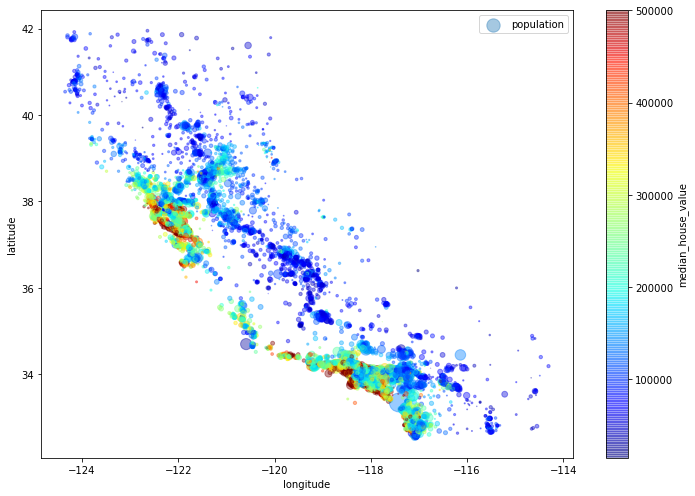

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()

save_fig("housing_prices_scatterplot")

California housing prices: red is expensive, blue is cheap, larger circles indicate
areas with a larger population

## 3.2) Looking for Correlations

### using `corr()` method

#### Finding the correlation with `median_house_value`
- The correlation coefficient only measures **linear correlations** (“if x goes up, then y generally goes up/down”).

In [48]:
corr_matrix = housing.corr()

In [49]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [50]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

As we can see from the correlation, `median income` has the highest positive correlation with median house value which makes sense. There is negative correlation with latitude where house price have a slight tedency to go down when you go north.

Another way to check correlation is using `scatter_matrix` function.

### using `pandas scatter_matrix()` function

In [51]:
from pandas.plotting import scatter_matrix

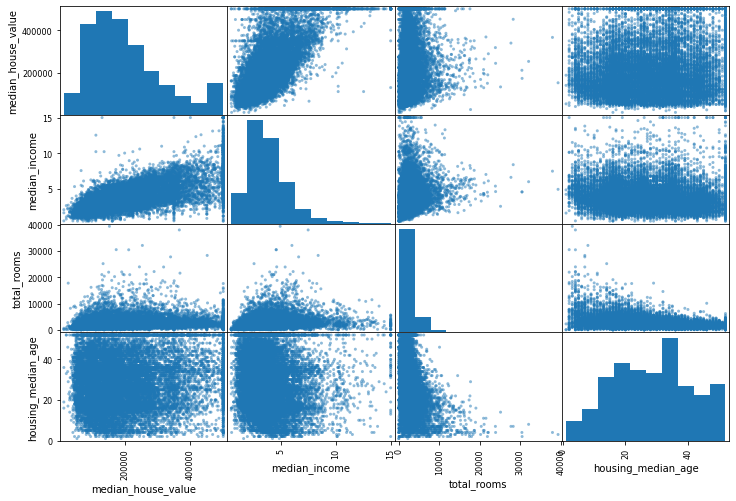

In [52]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8));

Based on the above graph, the most promising attribute to predict the median house value is median income. So we will zoom in.

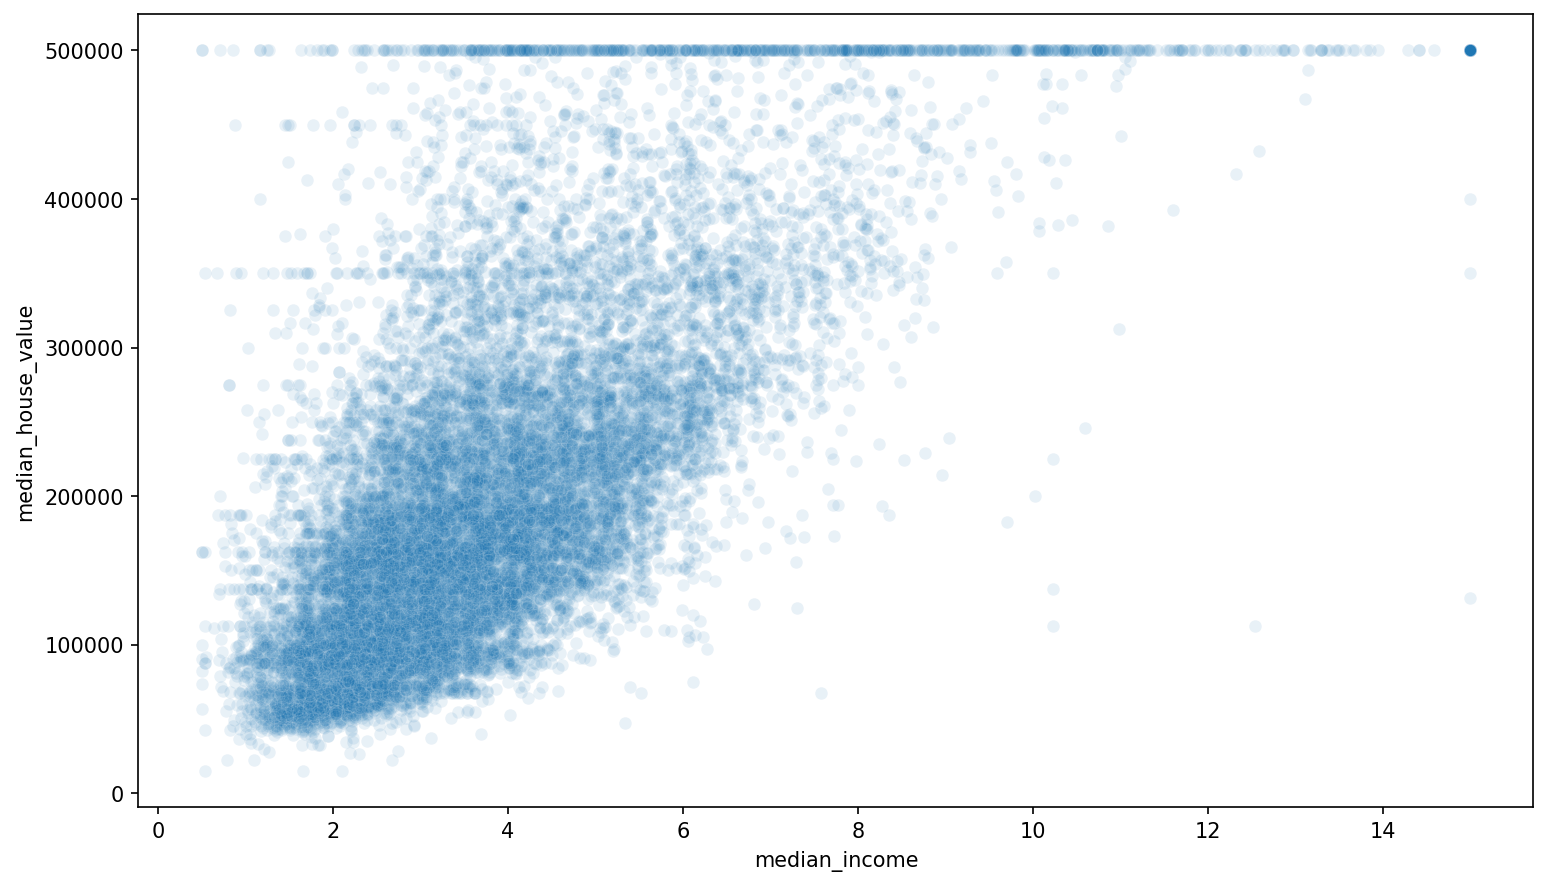

In [53]:
plt.figure(figsize=(12,7), dpi=150)
sns.scatterplot(data=housing, x='median_income', y='median_house_value', alpha=0.1);

+ We can see the strong postive correlation and the points are not too dispersed.
+ price cap we noticed earlier is cleary visible as a horizontal line at 500,000.

+ However this plot reveals another less obvious straight line: horizontal line around 450,000  another around 350,000, perhaps one around |280,000, and a few more below that.

NOTE: we might want to remove those data quirk by removing corresponding districts.

##  3.3) Experimenting with Attribute Combinations
- preparing the data for Machine Learning algorithms is to try out various attribute combinations.

 For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. 

In [54]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN


In [55]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [56]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965


In [57]:
# look at correlation matrix again
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Now we can see that there is new attribute `bedrooms_per_room` is much more correlated with median house value. Seem like houses with less bedrooms tends to be more expensive.

The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

--------

## 4) Prepare the Data for Machine Learning Algorithms
Instead of doing this manually, we should define and use functions for the following reasons.
+ This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
+ You will gradually build a library of transformation functions that you can reuse in future projects.
+ You can use these functions in your live system to transform the new data before feeding it to your algorithms.
+ This will make it possible for you to easily try various transformations and see which combination of transformations works best.

In [58]:
# separate features and label
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## 4.1) Data Cleaning (for missing values)
### Numerical Features

In [59]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

#### There are 3 ways to handle missing values.
- 1) drop the rows with missing values
- 2) drop the whole column with missing values
- 3) imputation (set default or mean/median value)

We can accomplish these by using `dropna()`, `drop()`, and `fillna()`methods.

#### Example

In [60]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN


In [61]:
# option 1
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [62]:
# option 2
sample_incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [63]:
# option 3
median = housing['total_bedrooms'].median()

In [64]:
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)

In [65]:
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


--------

### using sklearn simple imputer

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
imputer = SimpleImputer(strategy='median')

In [68]:
# as median can only be computed on numerical values, we will exclude ocean_proximity column
housing_numerical = housing.drop('ocean_proximity', axis=1)

In [69]:
# now will do the imputing
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

#### The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. 

In [70]:
# The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. 
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [71]:
housing_numerical.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Transform the training set:

In [72]:
# now we can use trained imputer to transform ttraining set by replacing missing values with the learned medians:
X = imputer.transform(housing_numerical)

In [73]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [74]:
# As a result is numpy array, we need to transform to pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)

In [75]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [76]:
# recheck the previous missing rows
# now those rows are filled with median value: 433.0
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


-------

## 4.2) Handling Text and Categorical Attributes

In [77]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [78]:
housing_categorical.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

### Ordinal Encoder
- convert categories from text to number

In [79]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categorical = ordinal_encoder.fit_transform(housing_categorical)

housing_categorical[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

#### like inputer.statistics_ , we can acess categories of learned encoder

In [80]:
# like inputer.statistics_ , we can acess categories of learned encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. 
+ This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), 
+ but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

### OneHot Encoder

To fix this issue, a common solution is to create one binary attribute per category: 
+ one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), 
+ another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 

This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called **dummy** attributes. 

In [81]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
housing_categorical_1hot = oh_encoder.fit_transform(housing_categorical)

housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:**

In [82]:
housing_categorical_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**Alternatively, we can set `sparse=False` when creating the OneHotEncoder:**

In [83]:
oh_encoder = OneHotEncoder(sparse=False)
housing_categorical_1hot = oh_encoder.fit_transform(housing_categorical)
housing_categorical_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [84]:
# we can also accesss their trained parameter
oh_encoder.categories_

[array([0., 1., 2., 3., 4.])]

## 4.3) Custom Transformers

Sometimes, we need additional columns for our ML. In this case we can use custom transformers add extra attributes:
**The more you automate these data preparation steps, the more combinations you can automaticallytry out, making it much more likely that you will find a great combination (and saving you a lot of time).**


You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on **duck typing (not inheritance)**,

all you need to do is **create a class and implement three methods:**
+ `fit() (returning self)`
+ `transform()`
+ `fit_transform()`

In [85]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

In [89]:
# columns index for those related features (total_rooms, total_bedrooms, population, households)
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, household_ix = [housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] # get every rows for that features divided by rows of household
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_household = X[:, bedrooms_ix] / X[: , household_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_added = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_added.transform(housing.values)

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [90]:
housing_extra_attributes = pd.DataFrame(
    housing_extra_attributes,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


We can see that our newly created columns are now available in DataFrame.

## 4.4) Feature Scaling

- **Min Max Scaling (Normalization)**: 
- **Standardization**: 

### Min-max scaling (many people call this normalization) is the simplest: 
values are shifted
and rescaled so that they end up ranging from 0 to 1. We do this by subtracting
the min value and dividing by the max minus the min. Scikit-Learn provides a transformer
called MinMaxScaler for this. It has a feature_range hyperparameter that lets
you change the range if, for some reason, you don’t want 0–1.

### Standardization is different: 
first it subtracts the mean value (so standardized values
always have a zero mean), and then it divides by the standard deviation so that the
resulting distribution has unit variance. 

Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algorithms
(e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for
standardization.

## 4.5) Transformation Pipelines

there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations.

**When using pipeline, the last estimator must be Transformers.**

#### 4.5.1) Small pipeline for Numerical Attributes


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [92]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [93]:
housing_numerical_tr = numerical_pipeline.fit_transform(housing_numerical)

In [94]:
housing_numerical_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871, -0.1215581 ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.26453207],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499, -0.15013227],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414,  0.06597972],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.06408293],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294, -0.06430388]])

#### 4.5.2) Column Transformer

So far, we have handled the categorical columns and the numerical columns separately.
It would be more convenient to have **a single transformer able to handle all columns,
applying the appropriate transformations to each column**. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
is that it works great with pandas DataFrames.

In [95]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numerical)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [96]:
cat_attribs = ['ocean_proximity']

In [97]:
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, num_attribs), # a tuple with name, a transformer or pipeline, list of features columns names
    ('cat', OneHotEncoder(), cat_attribs),
])

In [98]:
housing_prepared = full_pipeline.fit_transform(housing)

In [99]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
housing_prepared.shape

(16512, 16)

OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. 

When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of nonzero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3). In this example, it returns a dense matrix.

---------

# 5) Select and Train Model

## 5.1) Training and Evaluating on Training Set

In [101]:
# Let's train a Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [102]:
# Let's test out a few instances from training set:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Prediction: ', lin_reg.predict(some_data_prepared))

Prediction:  [211881.21811279 321219.24211009 210877.63065012  62198.25451316
 194847.8414579 ]


Compare against the actual values:

In [103]:
print('Labels: ', list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [104]:
# Let's measure RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

68911.49637588045

most districts’ median_housing_values range between 120,000 and 265,000, so a typical prediction error of
68,628 is not very satisfying.

This is an example of a model underfitting the training
data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

#### the main ways to fix underfitting are 
- to select a more powerful model
- to feed the training algorithm with better features
- or to reduce the constraints on the model.

### Option 5.1.1) Using more powerful model

In [105]:
# let's use Decision tree Regressor model
from sklearn.tree import DecisionTreeRegressor

In [106]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [107]:
# let's evaluate
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training
and part of it for model validation.

## 5.2) Better Evaluation using Cross-Validation

One way to evaluate the Decision Tree model would be to use the
train_test_split() function to split the training set into a smaller training set and a
validation set, then train your models against the smaller training set and evaluate
them against the validation set. It’s a bit of work, but nothing too difficult, and it
would work fairly well.

**A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing
the 10 evaluation scores:**

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                                        scoring='neg_mean_squared_error',
                                        cv=10)

tree_rmse_scores = np.sqrt(-scores) # we need to multiply by -1 as we were using negative mean squared error

Scikit-Learn’s cross-validation features expect a **utility function
(greater is better) rather than a cost function (lower is better)**, so
the scoring function is actually the opposite of the MSE (i.e., a negative
value), which is why the preceding code computes -scores
before calculating the square root.

In [110]:
def display_scores(scores):
    print('\nScores: ', scores)
    print('\nMean: ', scores.mean())
    print('\nStandard Deviation: ', scores.std())

In [111]:
display_scores(tree_rmse_scores) # 10 scores for each fold


Scores:  [71111.22486285 70216.13755946 70682.77595021 72959.07421063
 70596.60523472 75054.51954481 74456.42223662 69424.97043901
 77137.27159169 70502.31825281]

Mean:  72214.13198828092

Standard Deviation:  2424.200236985265


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model!

Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439.

In [112]:
# just to be sure, calclate scores for linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                                            cv=10, scoring='neg_mean_squared_error')

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores:  [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]

Mean:  69302.41894389637

Standard Deviation:  2653.4606994470496


It seems like Decision Tree model is overfitting and perform worse than Linear Regression model.

### Let's try Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [115]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18775.56278775116

In [116]:
# using cross val
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                        scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores:  [49409.11793492 47577.22216758 49669.56013492 52806.39072514
 49610.48412187 53469.73181314 49005.8839892  48081.7538077
 53254.45337659 50367.94871638]

Mean:  50325.254678744684

Standard Deviation:  2018.2085371969788


the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set.

### Let's try SVR

In [123]:
from sklearn.svm import SVR

In [125]:
svm_reg = SVR(kernel='linear')

svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

In [127]:
svm_mse = mean_squared_error(housing_labels, housing_predictions)

smv_rmse = np.sqrt(svm_mse)
smv_rmse

111571.89454322006

### Saving the trained Model


In [117]:
import joblib

In [118]:
joblib.dump(lin_reg, 'models/lin_reg.pkl')

['models/lin_reg.pkl']

In [119]:
loaded_model = joblib.load('models/lin_reg.pkl')


---------

# 6) Fine Tune Your Model

## 6.1) Grid Search

- we can fine tune the model by fiddling with hyperparameters manually, until we find the best combination of hyperparameter values.
- Grid Seach can do this automatically.

All you need
to do is tell it **which hyperparameters you want it to experiment with and what values
to try out, and it will use cross-validation to evaluate all the possible combinations of
hyperparameter values**.

**TIP: when you have no idea what value a parameter should have, a simple approach is to try out consecutive powers of 10 (or a small number if you want a more fine-grained search)**

In [121]:
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # then try 6 (2×3) combinations with bootstrap set as False
]

# as a result, grid search will explore total 18 combinations of Hyperparameters values
# it will train each model 5 times (as we will set cv as 5)
# All the total will be 18 x 5 = 90 rounds of teaching

In [134]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                                          scoring='neg_mean_squared_error',
                                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [135]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

**TIPS: Since 8 and 30 are the maximum values that were evaluated, you
should probably try searching again with higher values; the score
may continue to improve.**

In [136]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

**NOTE:**If GridSearchCV is initialized with `refit=True (which is the
default), then once it finds the best estimator using crossvalidation,
it retrains it on the whole training set. This is usually a
good idea, since feeding it more data will likely improve its
performance.`

Let's look at the score of each hyperparameter combination tested during the grid search:

In [137]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65057.6367011754 {'max_features': 2, 'n_estimators': 3}
55458.882453941194 {'max_features': 2, 'n_estimators': 10}
53051.18712904196 {'max_features': 2, 'n_estimators': 30}
60390.60667511211 {'max_features': 4, 'n_estimators': 3}
52430.76148375605 {'max_features': 4, 'n_estimators': 10}
50125.81443168933 {'max_features': 4, 'n_estimators': 30}
58465.31719067378 {'max_features': 6, 'n_estimators': 3}
51960.96252833072 {'max_features': 6, 'n_estimators': 10}
50074.05583534389 {'max_features': 6, 'n_estimators': 30}
58350.66560712871 {'max_features': 8, 'n_estimators': 3}
52582.094706782664 {'max_features': 8, 'n_estimators': 10}
49796.488984902244 {'max_features': 8, 'n_estimators': 30}
63279.07571368587 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54742.41809409313 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59273.97984539481 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52253.6116660728 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

RMSE score for best solution 49796.488984902244 {'max_features': 8, 'n_estimators': 30}, which is better than the one using default parameter Mean:  50325.254678744684.

In [138]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081436,0.013689,0.007250,0.007077,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.844325e+09,-4.558245e+09,...,-4.232496e+09,2.761337e+08,18,-1.115961e+09,-1.173733e+09,-1.133396e+09,-1.184175e+09,-1.118195e+09,-1.145092e+09,2.848403e+07
1,0.267551,0.014374,0.014581,0.001431,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.841996e+09,-3.237004e+09,...,-3.075688e+09,2.024817e+08,11,-5.855017e+08,-5.976001e+08,-5.676994e+08,-5.948483e+08,-5.845597e+08,-5.860418e+08,1.048887e+07
2,0.866731,0.047327,0.033964,0.003376,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.594414e+09,-2.918044e+09,...,-2.814428e+09,1.715236e+08,9,-4.480930e+08,-4.412281e+08,-4.392422e+08,-4.464524e+08,-4.379736e+08,-4.425979e+08,3.989349e+06
3,0.136639,0.010004,0.003403,0.001745,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.655348e+09,-3.806942e+09,...,-3.647025e+09,1.476672e+08,16,-1.009304e+09,-9.802666e+08,-9.647966e+08,-9.829097e+08,-1.005031e+09,-9.884616e+08,1.653460e+07
4,0.451423,0.019699,0.012610,0.001626,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.527769e+09,-2.911820e+09,...,-2.748985e+09,1.581967e+08,7,-5.234647e+08,-5.119605e+08,-5.053558e+08,-5.277209e+08,-5.194284e+08,-5.175861e+08,8.023634e+06
5,1.296449,0.040670,0.031745,0.008783,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.307747e+09,-2.629550e+09,...,-2.512597e+09,1.590769e+08,3,-3.903429e+08,-3.834990e+08,-3.840501e+08,-3.966812e+08,-3.823631e+08,-3.873873e+08,5.414981e+06
6,0.165427,0.011258,0.005927,0.005188,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.108276e+09,-3.500227e+09,...,-3.418193e+09,1.775551e+08,13,-9.457117e+08,-8.829835e+08,-8.752106e+08,-9.561821e+08,-8.939788e+08,-9.108133e+08,3.347140e+07
7,0.566122,0.030585,0.010606,0.005355,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.430394e+09,-2.847300e+09,...,-2.699942e+09,1.721816e+08,4,-4.939842e+08,-4.861634e+08,-4.831734e+08,-5.130327e+08,-4.919484e+08,-4.936604e+08,1.043555e+07
8,1.719049,0.036498,0.027174,0.006716,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.321452e+09,-2.637616e+09,...,-2.507411e+09,1.512702e+08,2,-3.863392e+08,-3.764000e+08,-3.756379e+08,-3.922569e+08,-3.832880e+08,-3.827844e+08,6.236221e+06
9,0.195774,0.007981,0.000801,0.001601,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.291792e+09,-3.593412e+09,...,-3.404800e+09,1.123287e+08,12,-9.185843e+08,-8.955026e+08,-8.891914e+08,-9.098863e+08,-8.959230e+08,-9.018175e+08,1.077286e+07



--------
## 5.2) Randomized Search
useful if we have larger space of parameters, use randomized search instead of grid search.

Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperprameter at every iteration. This approach has two main benefits.

- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
- **Simply by setting the number of iterations**, you have more control over the computing budget you want to allocate to hyperparameter search.


In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [142]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

In [143]:
forest_reg = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                                                              n_iter=10, cv=5,
                                                              scoring='neg_mean_squared_error', random_state=42)

In [144]:
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009F13B2D8E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009F0C69F4C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [147]:
random_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [148]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [145]:
cvres = random_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

48879.29503544632 {'max_features': 7, 'n_estimators': 180}
51520.93505538564 {'max_features': 5, 'n_estimators': 15}
50369.37167852501 {'max_features': 3, 'n_estimators': 72}
50417.0990063525 {'max_features': 5, 'n_estimators': 21}
48933.58163696999 {'max_features': 7, 'n_estimators': 122}
50361.13011228164 {'max_features': 3, 'n_estimators': 75}
50309.575816299555 {'max_features': 3, 'n_estimators': 88}
49231.732870994034 {'max_features': 5, 'n_estimators': 100}
50159.83989266944 {'max_features': 3, 'n_estimators': 150}
65454.02302647721 {'max_features': 5, 'n_estimators': 2}


it even perform better than Grid Search CV. Mean score for best solution is 48879.29503544632 {'max_features': 7, 'n_estimators': 180} where Grid Search one is 49796.488984902244 {'max_features': 8, 'n_estimators': 30}

## 5.3) Ensemble Methods

Another way to fine tune your model is to try to combine the models that perform best.

The group (ensemble) will often perform better than the best individual model (just like Random Forest performs better than individual Decision Tree model), especially if the individual models make very different types of error.

## 5.4) Analyze the Best Models and their Errors

In [150]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

array([7.05092744e-02, 6.37433261e-02, 4.30667683e-02, 1.52057064e-02,
       1.46355911e-02, 1.49319387e-02, 1.44082171e-02, 3.73785246e-01,
       7.49823528e-02, 1.09855812e-01, 2.27763679e-02, 1.23629559e-02,
       1.63414704e-01, 5.81207509e-05, 2.26357571e-03, 4.00004222e-03])

In [152]:
# Let's display these importance scores next to their corresponding attributes names
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_hhold']

cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37378524585343204, 'median_income'),
 (0.16341470437646685, 'INLAND'),
 (0.10985581242772761, 'pop_per_hhold'),
 (0.07498235277606345, 'rooms_per_hhold'),
 (0.0705092744188069, 'longitude'),
 (0.06374332607916182, 'latitude'),
 (0.04306676828102384, 'housing_median_age'),
 (0.022776367915771957, 'bedrooms_per_hhold'),
 (0.01520570642024311, 'total_rooms'),
 (0.014931938743932912, 'population'),
 (0.014635591067265983, 'total_bedrooms'),
 (0.01440821705892062, 'households'),
 (0.012362955894580422, '<1H OCEAN'),
 (0.004000042221816918, 'NEAR OCEAN'),
 (0.0022635757139284904, 'NEAR BAY'),
 (5.812075085708576e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).

## 5.5) Evaluate Your System on Test Set

In [153]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [155]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47627.91557871936

How would you know your model is ready to lunch?
Example: it is just 0.1% better than the current model in production.

**For this, we can compute 95% confidence interval for the generalization error using `scipy.stats.t.interval()`**

In [156]:
from scipy import stats

### We can compute a 95% confidence interval for the test RMSE:

In [158]:
confidence = 0.95

squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                    loc=squared_errors.mean(),
                                    scale=stats.sem(squared_errors)))

array([45621.63878493, 49553.02976938])

-------

# 6) Launch, Monitor, and Maintain Your System

You now need to get your solution ready for production
(e.g., polish the code, write documentation and tests, and so on). Then you
can deploy your model to your production environment. One way to do this is to save
the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing
and prediction pipeline, then load this trained model within your production environment
and use it to make predictions by calling its predict() method.

You can wrap the model in web services which can simpify the scaling and upgrades without affecting the main application.

Or on Google
Cloud AI Platform (formerly known as Google Cloud ML Engine): just save your
model using joblib and upload it to Google Cloud Storage (GCS), then head over to
Google Cloud AI Platform and create a new model version, pointing it to the GCS
file. That’s it!


But deployment is not the end of the story. You also need to write monitoring code to
check your system’s live performance at regular intervals and trigger alerts when it
drops.

If the data keeps evolving, you will need to update your datasets and retrain your
model regularly. You should probably automate the whole process as much as possible.
**Here are a few things you can automate:**

- Collect fresh data regularly and label it (e.g., using human raters).
- Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.
- Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why).

you could trigger an alert if more and more inputs are missing a feature, or if its mean or
standard deviation drifts too far from the training set, or a categorical feature starts
containing new categories.

Finally, make sure you keep backups of every model you create and have the process
and tools in place to roll back to a previous model quickly, in case the new model
starts failing badly for some reason.

---------

# Full Pipeline with both preparation and prediction

In [159]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

In [160]:
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([211881.21811279, 321219.24211009, 210877.63065012,  62198.25451316,
       194847.8414579 ])

------

# Exercises

# 1) 

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [164]:
param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100., 300., 1000.0], 'gamma':[0.01, 0.03, 0.1, 0.3, 1., 3.]}
]

In [165]:
svm_reg = SVR()

grid_search = GridSearchCV(svm_reg, param_grid,
                                          cv=5,
                                          scoring='neg_mean_squared_error',
                                          verbose=2)

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   6.7s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   7.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   7.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   7.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=0.3, kernel=rbf, total=  12.1s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  11.8s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  11.4s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  11.8s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  11.6s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  11.4s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=  13.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] .

[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  11.7s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  11.7s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  11.7s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  11.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  11.4s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  11.4s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  11.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .

[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  11.4s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  12.4s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  12.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  12.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  12.3s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=  12.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=  12.3s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] .

[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=  11.9s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=  11.6s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  11.1s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  11.7s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  11.8s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  11.8s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  11.8s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 48.9min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [167]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)

rmse

70709.3122813859


That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:

In [168]:
grid_search.best_params_

{'C': 3000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

# 2)

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [184]:
# Note: gamma is ignored when kernel is "linear"
param_distributions = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

In [185]:
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distributions,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   6.8s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   6.5s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   7.7s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   7.6s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   7.2s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  14.6s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  14.2s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  14.3s
[CV] C=26290.2

[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  42.7s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  49.5s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  46.7s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  47.6s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  43.6s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   7.9s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   8.0

[CV]  C=761.4316758498783, gamma=2.6126336514161914, kernel=linear, total=   6.3s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  29.1s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  29.9s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  31.3s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  27.3s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  30.7s
[CV] C=2423.0759984939164, gamma=3.248614270240346, kernel=linear ....
[CV]  C=2423.0759984939164, gamma=3.248614270240346, kernel=linear, total=   

[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  20.9s
[CV] C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  23.8s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=  11.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=  11.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=  11.7s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=  11.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=  11.4s
[CV] C=399.7268155705

[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   6.3s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   6.3s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   6.5s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=  11.3s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=  11.6s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=  11.4s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=  11.9s
[CV] C=2

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 65.5min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009F0CCEDAC0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009F41F9C130>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [179]:
negative_mse = random_search.best_score_
rmse = np.sqrt(-negative_mse)

rmse

48879.29503544632

Now this is much closer to the performance of the RandomForestRegressor (but not quite there yet). Let's check the best hyperparameters found:

In [174]:
random_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [175]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

------


# 3) 
Question: Try adding a transformer in the preparation pipeline to select only the most important attributes